# Network Analysis Lab

Complete the following exercises to help solidify your understanding of network analysis.

In [262]:
import networkx as nx
import nxviz
import pandas as pd
%matplotlib inline
import igviz as ig
import community as louvain
from networkx.algorithms import community

## U.S. Mens Basketball Data Set

In the `us_mens_basketball.csv` data set, each row represents an single basketball player's participation in a single event at a single Olympics. 

In [5]:
basketball = pd.read_csv('/Users/annavilardell/Desktop/BootcampData/40-lab-network-analysis/data/us_mens_basketball.csv')

In [151]:
basketball

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,130580,Deron Michael Williams,M,24.0,191.0,95.0,United States,USA,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,Gold
218,130580,Deron Michael Williams,M,28.0,191.0,95.0,United States,USA,2012 Summer,2012,Summer,London,Basketball,Basketball Men's Basketball,Gold
219,130602,"Howard Earl ""Howie"" Williams",M,24.0,183.0,76.0,United States,USA,1952 Summer,1952,Summer,Helsinki,Basketball,Basketball Men's Basketball,Gold
220,130843,"George ""Jiff"" Wilson",M,22.0,203.0,95.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Basketball,Basketball Men's Basketball,Gold


## 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

Sort descending by the number of pairwise interactions. Which pair of players have competed in the most Olympics together?

In [ ]:
"""
The nodes in the graph represent the entities in our network and 
the edges are visualized as lines that connect nodes where a relationship exists between
the entities they represent.
"""

In [119]:
# nodes = entities = Name 
# edges =  relationships = represented by whether the players played in the same Olympics together


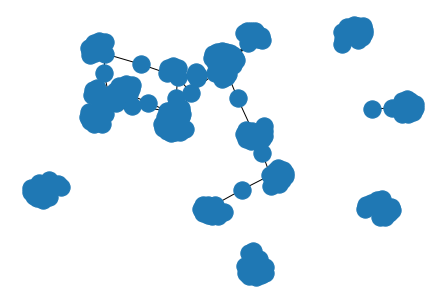

In [118]:
# FIRST TRY 

g = nx.from_pandas_edgelist(basketball, source='Name', target='Games') 
nx.draw(g)

In [ ]:
# SECOND TRY

In [70]:
# Make a list of the Games
games = list(basketball.Games.unique())

In [69]:
# Make a list of the Names
names = list(basketball.Name.unique())

In [102]:
dict(zip(games, games))

{'2000 Summer': '2000 Summer',
 '1984 Summer': '1984 Summer',
 '1988 Summer': '1988 Summer',
 '2004 Summer': '2004 Summer',
 '2008 Summer': '2008 Summer',
 '2012 Summer': '2012 Summer',
 '2016 Summer': '2016 Summer',
 '1976 Summer': '1976 Summer',
 '1960 Summer': '1960 Summer',
 '1936 Summer': '1936 Summer',
 '1972 Summer': '1972 Summer',
 '1948 Summer': '1948 Summer',
 '1992 Summer': '1992 Summer',
 '1996 Summer': '1996 Summer',
 '1964 Summer': '1964 Summer',
 '1968 Summer': '1968 Summer',
 '1952 Summer': '1952 Summer',
 '1956 Summer': '1956 Summer'}

In [103]:
# How many connections does 'George "Jiff" Wilson' have coming out of it?
g.degree('2000 Summer')

12

In [104]:
[game for game in games]

['2000 Summer',
 '1984 Summer',
 '1988 Summer',
 '2004 Summer',
 '2008 Summer',
 '2012 Summer',
 '2016 Summer',
 '1976 Summer',
 '1960 Summer',
 '1936 Summer',
 '1972 Summer',
 '1948 Summer',
 '1992 Summer',
 '1996 Summer',
 '1964 Summer',
 '1968 Summer',
 '1952 Summer',
 '1956 Summer']

In [107]:
# all connection comming out af all name(players)
[g.degree(game) for game in games]

[12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 12, 14, 12, 12, 12, 12, 14, 12]

## 2. Use the `from_pandas_edgelist` method to turn the data frame into a graph.

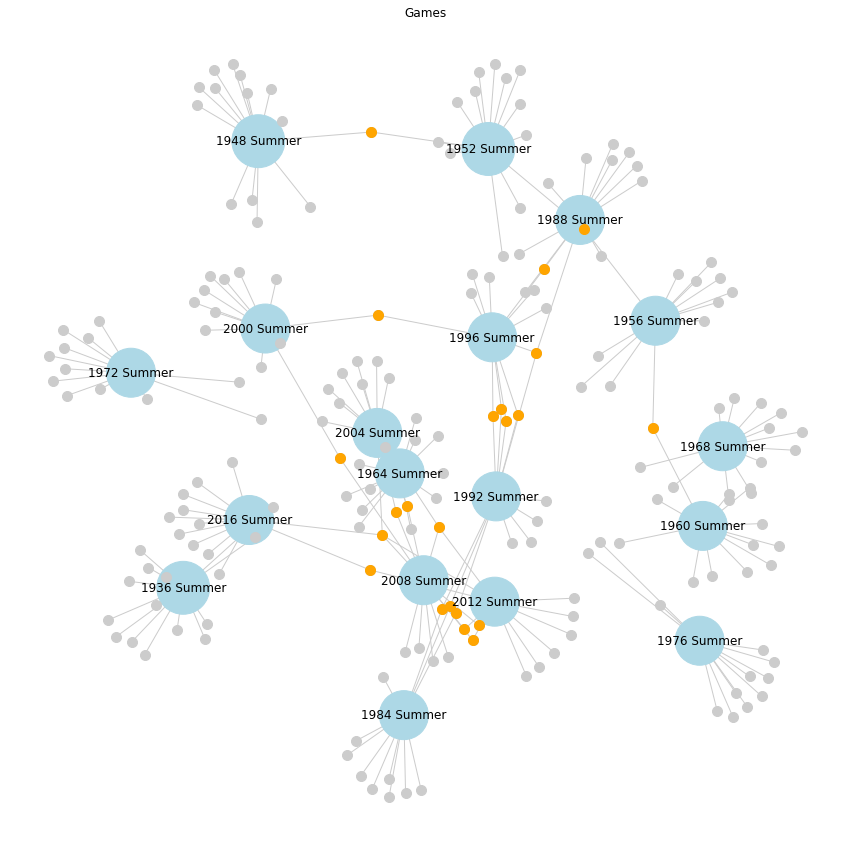

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

# 1. Create graph
g = nx.from_pandas_edgelist(basketball, source='Name', target='Games') 

# 2. Create layout for our nodes 
layout = nx.spring_layout(g,iterations=20)

# 3. Draw the parts we want
# Edges thin and grey
# Names small and grey
# Game sized according to their number of connections
# Game blue
# Labels for game ONLY
# Names who are highly connected are a highlighted color

# Go through every game, ask the graph how many connections it has. 
# Multiply that by 80 (for example) to get the circle size
game_size = [g.degree(game) * 200 for game in games]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=games, 
                       node_size=game_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw EVERYONE
nx.draw_networkx_nodes(g, layout, nodelist=names, node_color='#cccccc', node_size=100)

# Draw POPULAR PEOPLE
popular_names = [name for name in names if g.degree(name) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_names, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(games, games))
nx.draw_networkx_labels(g, layout, labels=node_labels)

# 4. Turn off the axis because it will be a mess if all names appear
plt.axis('off')

plt.title("Games")

# 5. Sshow graph
plt.show()


I found help from this source [here]<http://jonathansoma.com/lede/algorithms-2017/classes/networks/networkx-graphs-from-source-target-dataframe/>

## 3. Compute and print the following graph statistics for the graph:

- Number of nodes
- Number of edges
- Average degree
- Density

In [154]:
print("Number of nodes (player names): ", g.size())
print("Number of edges (relationships): ", g.order())
print("Average degree: ", g.degree())
print("Density: ", nx.density(g))

Number of nodes (player names):  222
Number of edges (relationships):  214
Average degree:  [('Julius Shareef Abdur-Rahim', 1), ('2000 Summer', 12), ('Stephen Todd "Steve" Alford', 1), ('1984 Summer', 12), ('Walter Ray Allen', 1), ('William Lloyd "Willie" Anderson, Jr.', 1), ('1988 Summer', 12), ('Carmelo Kyan Anthony', 4), ('2004 Summer', 12), ('2008 Summer', 12), ('2012 Summer', 12), ('2016 Summer', 12), ('Michel Taylor "Tate" Armstrong', 1), ('1976 Summer', 12), ('Jay Joseph Hoyland Arnette', 1), ('1960 Summer', 12), ('Stacey Orlando Augmon', 1), ('Vincent Lamont "Vin" Baker', 1), ('Samuel J. "Sam" Balter, Jr.', 1), ('1936 Summer', 14), ('Michael Allen "Mike" Bantom', 1), ('1972 Summer', 12), ('Clifford Eugene "Cliff" Barker', 1), ('1948 Summer', 14), ('Charles Wade Barkley', 2), ('1992 Summer', 12), ('1996 Summer', 12), ('Donald Argee "Don" Barksdale', 1), ('Harrison Bryce Jordan Barnes', 1), ('Velvet James "Jim" Barnes', 1), ('1964 Summer', 12), ('Michael Thomas "Mike" Barrett', 1

## 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [242]:
best_betweener= nx.betweenness_centrality(g)
best_betweener

{'Julius Shareef Abdur-Rahim': 0.0,
 '2000 Summer': 0.11502347417840375,
 'Stephen Todd "Steve" Alford': 0.0,
 '1984 Summer': 0.03514483125166091,
 'Walter Ray Allen': 0.0,
 'William Lloyd "Willie" Anderson, Jr.': 0.0,
 '1988 Summer': 0.03890955797679157,
 'Carmelo Kyan Anthony': 0.049834155175638044,
 '2004 Summer': 0.03229914075648862,
 '2008 Summer': 0.10272905778486432,
 '2012 Summer': 0.02832649284947981,
 '2016 Summer': 0.039364770031791056,
 'Michel Taylor "Tate" Armstrong': 0.0,
 '1976 Summer': 0.0029231995748073346,
 'Jay Joseph Hoyland Arnette': 0.0,
 '1960 Summer': 0.022411196740189564,
 'Stacey Orlando Augmon': 0.0,
 'Vincent Lamont "Vin" Baker': 0.0,
 'Samuel J. "Sam" Balter, Jr.': 0.0,
 '1936 Summer': 0.004030472141022234,
 'Michael Allen "Mike" Bantom': 0.0,
 '1972 Summer': 0.0029231995748073346,
 'Clifford Eugene "Cliff" Barker': 0.0,
 '1948 Summer': 0.025910178049428644,
 'Charles Wade Barkley': 0.009540260430507576,
 '1992 Summer': 0.06073020934833319,
 '1996 Summer':

In [243]:
# check most important link of games & names
for i in sorted(best_betweener, key=best_betweener.get, reverse=True):
    print(i, best_betweener[i])

2000 Summer 0.11502347417840375
1996 Summer 0.10447485753092982
2008 Summer 0.10272905778486432
Gary Dwayne Payton 0.09442820444680662
Jason Frederick Kidd 0.09389671361502347
1992 Summer 0.06073020934833319
Carmelo Kyan Anthony 0.049834155175638044
1952 Summer 0.04079192133935689
2016 Summer 0.039364770031791056
1988 Summer 0.03890955797679157
1956 Summer 0.037292940030117815
1984 Summer 0.03514483125166091
David Maurice Robinson 0.03411432958337023
2004 Summer 0.03229914075648862
William Marion "Bill" Hougland 0.029763486579856495
2012 Summer 0.02832649284947981
1948 Summer 0.025910178049428644
Robert Albert "Bob" Kurland 0.023562760209053058
1960 Summer 0.022411196740189564
Burdette Eliele "Burdie" Haldorson 0.02125963327132607
Mitchell James "Mitch" Richmond, III 0.015021997814982136
LeBron Raymone James 0.012097075816182908
Patrick Aloysius Ewing 0.011958543715120904
Michael Jeffrey Jordan 0.011958543715120904
Christopher Paul "Chris" Mullin 0.011958543715120904
Charles Wade Barkl

In [ ]:
# top 5 best betweener connection
"""
Gary Dwayne Payton 0.09442820444680662
Jason Frederick Kidd 0.09389671361502347
Carmelo Kyan Anthony 0.049834155175638044
David Maurice Robinson 0.03411432958337023
William Marion "Bill" Hougland 0.029763486579856495
"""

"""
Meaning: 
Betweenness Centrality is another centrality that is based
on shortest path between nodes. It is determined as number of 
the shortest paths passing by the given node.
"""

## 5. Compute Eigenvector centrality for the graph and print the top 5 nodes with the highest centrality.

In [229]:
# nx.eigenvector_centrality(g) - this will give me an error as lots of 
# itineration are veing repeat (as I understood)
# so instead I use the below formula:
most_imp_link= nx.eigenvector_centrality_numpy(g)
most_imp_link

{'Julius Shareef Abdur-Rahim': 0.012320346948614296,
 '2000 Summer': 0.05532538721244322,
 'Stephen Todd "Steve" Alford': 0.000921608930056139,
 '1984 Summer': 0.004138549922860295,
 'Walter Ray Allen': 0.01232034694861428,
 'William Lloyd "Willie" Anderson, Jr.': 0.0011202331377579257,
 '1988 Summer': 0.005030485941115237,
 'Carmelo Kyan Anthony': 0.3027023157674235,
 '2004 Summer': 0.334545684410229,
 '2008 Summer': 0.4368386826814052,
 '2012 Summer': 0.3963639464847361,
 '2016 Summer': 0.19155779198907322,
 'Michel Taylor "Tate" Armstrong': -3.4133788844831954e-17,
 '1976 Summer': -1.1150926559666865e-16,
 'Jay Joseph Hoyland Arnette': -8.279905265890763e-17,
 '1960 Summer': -2.514882786435672e-16,
 'Stacey Orlando Augmon': 0.0011202331377579422,
 'Vincent Lamont "Vin" Baker': 0.012320346948614298,
 'Samuel J. "Sam" Balter, Jr.': -2.839579043441989e-16,
 '1936 Summer': -1.0310744684990752e-15,
 'Michael Allen "Mike" Bantom': 8.698653824694925e-17,
 '1972 Summer': 2.5210503996638208e

In [231]:
# check most important link of games & names
for i in sorted(most_imp_link, key=most_imp_link.get, reverse=True):
    print(i, most_imp_link[i])

2008 Summer 0.4368386826814052
2012 Summer 0.3963639464847361
2004 Summer 0.334545684410229
Carmelo Kyan Anthony 0.3027023157674235
LeBron Raymone James 0.26004453103374403
2016 Summer 0.19155779198907322
Kobe Bean Bryant 0.18554493672871541
Christopher Emmanuel "Chris" Paul 0.18554493672871541
Deron Michael Williams 0.18554493672871536
Carlos Austin Boozer, Jr. 0.1717786989327874
Dwyane Tyrone Wade, Jr. 0.17177869893278738
Kevin Wayne Durant 0.13092361683463616
Jason Frederick Kidd 0.10959945157637305
Tayshaun Durell Prince 0.09727910462775878
Christopher Wesson "Chris" Bosh 0.09727910462775877
Dwight David Howard 0.09727910462775875
Michael Wesley Redd 0.09727910462775874
Tyson Cleotis Chandler 0.08826583210095675
Andre Tyler Iguodala 0.08826583210095672
Anthony Marshon Davis, Jr. 0.0882658321009567
Kevin Wesley Love 0.0882658321009567
Russell Westbrook, Jr. 0.0882658321009567
James Edward Harden, Jr. 0.08826583210095668
Shawn Dwayne Marion 0.07449959430502867
Timothy Theodore "Tim" 

In [ ]:
# top 5 most important connection
"""
Carmelo Kyan Anthony 0.3027023157674235
LeBron Raymone James 0.26004453103374403
Kobe Bean Bryant 0.18554493672871541
Christopher Emmanuel "Chris" Paul 0.18554493672871541
Deron Michael Williams 0.18554493672871536
"""

"""
Meaning: 
Eigenvector centrality is a basic extension of degree centrality, 
which defines centrality of a node as proportional to its neighbors’ 
importance. When we sum up all connections of a node, not all 
neighbors are equally important.
"""

## 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.

In [ ]:
"""
Degree of a node is basically number of edges that it has
"""

In [169]:
# general degree for player names
nx.degree(g,names)

DegreeView({'Julius Shareef Abdur-Rahim': 1, 'Stephen Todd "Steve" Alford': 1, 'Walter Ray Allen': 1, 'William Lloyd "Willie" Anderson, Jr.': 1, 'Carmelo Kyan Anthony': 4, 'Michel Taylor "Tate" Armstrong': 1, 'Jay Joseph Hoyland Arnette': 1, 'Stacey Orlando Augmon': 1, 'Vincent Lamont "Vin" Baker': 1, 'Samuel J. "Sam" Balter, Jr.': 1, 'Michael Allen "Mike" Bantom': 1, 'Clifford Eugene "Cliff" Barker': 1, 'Charles Wade Barkley': 2, 'Donald Argee "Don" Barksdale': 1, 'Harrison Bryce Jordan Barnes': 1, 'Velvet James "Jim" Barnes': 1, 'Michael Thomas "Mike" Barrett': 1, 'Ralph Milton Beard, Jr.': 1, 'Lewis William "Lew" Beck, Jr.': 1, 'Walter Jones "Walt" Bellamy, Jr.': 1, 'Larry Joe Bird': 1, 'Ralph English Bishop': 1, 'Ronald Yngve "Ron" Bontemps': 1, 'Robert Lewis "Bob" Boozer': 1, 'Carlos Austin Boozer, Jr.': 2, 'Vincent Joseph "Vince" Boryla': 1, 'Christopher Wesson "Chris" Bosh': 1, 'Richard James "Dick" Boushka': 1, 'William Warren "Bill" Bradley': 1, 'James Turner "Jim" Brewer': 1,

In [221]:
# degree centrality fro games & names
most_popular= nx.degree_centrality(g)
most_popular

{'Julius Shareef Abdur-Rahim': 0.004694835680751174,
 '2000 Summer': 0.056338028169014086,
 'Stephen Todd "Steve" Alford': 0.004694835680751174,
 '1984 Summer': 0.056338028169014086,
 'Walter Ray Allen': 0.004694835680751174,
 'William Lloyd "Willie" Anderson, Jr.': 0.004694835680751174,
 '1988 Summer': 0.056338028169014086,
 'Carmelo Kyan Anthony': 0.018779342723004695,
 '2004 Summer': 0.056338028169014086,
 '2008 Summer': 0.056338028169014086,
 '2012 Summer': 0.056338028169014086,
 '2016 Summer': 0.056338028169014086,
 'Michel Taylor "Tate" Armstrong': 0.004694835680751174,
 '1976 Summer': 0.056338028169014086,
 'Jay Joseph Hoyland Arnette': 0.004694835680751174,
 '1960 Summer': 0.056338028169014086,
 'Stacey Orlando Augmon': 0.004694835680751174,
 'Vincent Lamont "Vin" Baker': 0.004694835680751174,
 'Samuel J. "Sam" Balter, Jr.': 0.004694835680751174,
 '1936 Summer': 0.06572769953051644,
 'Michael Allen "Mike" Bantom': 0.004694835680751174,
 '1972 Summer': 0.056338028169014086,
 'Cl

In [204]:
# see total Games
len(basketball.Games.value_counts())

18

In [215]:
# sorted by values. But here we see that we have games & names all included.
# first 18 values correspond to games, so we select from 19 & on to se only the names
sorted(nx.degree_centrality(g).values(), reverse=True)[18:]

[0.018779342723004695,
 0.014084507042253521,
 0.014084507042253521,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.009389671361502348,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.004694835680751174,
 0.00469483

In [216]:
# check most popular games & names
for i in sorted(most_popular, key=most_popular.get, reverse=True):
    print(i, most_popular[i])

1936 Summer 0.06572769953051644
1948 Summer 0.06572769953051644
1952 Summer 0.06572769953051644
2000 Summer 0.056338028169014086
1984 Summer 0.056338028169014086
1988 Summer 0.056338028169014086
2004 Summer 0.056338028169014086
2008 Summer 0.056338028169014086
2012 Summer 0.056338028169014086
2016 Summer 0.056338028169014086
1976 Summer 0.056338028169014086
1960 Summer 0.056338028169014086
1972 Summer 0.056338028169014086
1992 Summer 0.056338028169014086
1996 Summer 0.056338028169014086
1964 Summer 0.056338028169014086
1968 Summer 0.056338028169014086
1956 Summer 0.056338028169014086
Carmelo Kyan Anthony 0.018779342723004695
LeBron Raymone James 0.014084507042253521
David Maurice Robinson 0.014084507042253521
Charles Wade Barkley 0.009389671361502348
Carlos Austin Boozer, Jr. 0.009389671361502348
Kobe Bean Bryant 0.009389671361502348
Kevin Wayne Durant 0.009389671361502348
Patrick Aloysius Ewing 0.009389671361502348
Burdette Eliele "Burdie" Haldorson 0.009389671361502348
William Marion

In [ ]:
# top 5 most popular connection
"""
Carmelo Kyan Anthony 0.018779342723004695
LeBron Raymone James 0.014084507042253521
David Maurice Robinson 0.014084507042253521
Charles Wade Barkley 0.009389671361502348
Carlos Austin Boozer, Jr. 0.009389671361502348
"""

"""
Meaning: 
Degree of a node is basically number of edges that it has.
The basic intuition is that, nodes with more connections are more 
influential and important in a network. In other words, 
the person with higher friend count in a social network, 
the more cited paper (in-degree) in a scientific citation network
is the one that is more central according to this metric.
"""

## 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

In [255]:
plt.figure(figsize=(20,10))

fig = ig.plot(
    g,
    title="Network Visualization",
    layout="kamada");
fig.show()

<Figure size 1440x720 with 0 Axes>

## 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

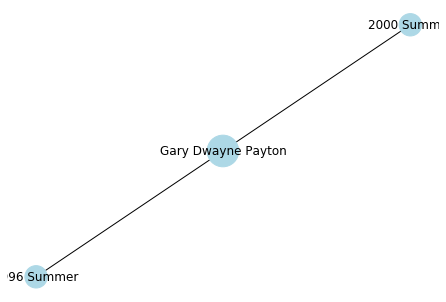

In [261]:
ego_g = nx.ego_graph(g, "Gary Dwayne Payton")
d = dict(ego_g.degree)
nx.draw(ego_g, node_color='lightblue', 
        with_labels=True, 
        nodelist=d, 
        node_size=[d[k]*500 for k in d])

## 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.

In [272]:
# louvain- tells us in which community is 
#each node and assignes it to the community
louvain.best_partition(g)

{'Julius Shareef Abdur-Rahim': 0,
 '2000 Summer': 0,
 'Stephen Todd "Steve" Alford': 1,
 '1984 Summer': 1,
 'Walter Ray Allen': 0,
 'William Lloyd "Willie" Anderson, Jr.': 2,
 '1988 Summer': 2,
 'Carmelo Kyan Anthony': 3,
 '2004 Summer': 3,
 '2008 Summer': 3,
 '2012 Summer': 3,
 '2016 Summer': 4,
 'Michel Taylor "Tate" Armstrong': 5,
 '1976 Summer': 5,
 'Jay Joseph Hoyland Arnette': 6,
 '1960 Summer': 6,
 'Stacey Orlando Augmon': 2,
 'Vincent Lamont "Vin" Baker': 0,
 'Samuel J. "Sam" Balter, Jr.': 7,
 '1936 Summer': 7,
 'Michael Allen "Mike" Bantom': 8,
 '1972 Summer': 8,
 'Clifford Eugene "Cliff" Barker': 9,
 '1948 Summer': 9,
 'Charles Wade Barkley': 1,
 '1992 Summer': 1,
 '1996 Summer': 1,
 'Donald Argee "Don" Barksdale': 9,
 'Harrison Bryce Jordan Barnes': 4,
 'Velvet James "Jim" Barnes': 10,
 '1964 Summer': 10,
 'Michael Thomas "Mike" Barrett': 11,
 '1968 Summer': 11,
 'Ralph Milton Beard, Jr.': 9,
 'Lewis William "Lew" Beck, Jr.': 9,
 'Walter Jones "Walt" Bellamy, Jr.': 6,
 'Larr

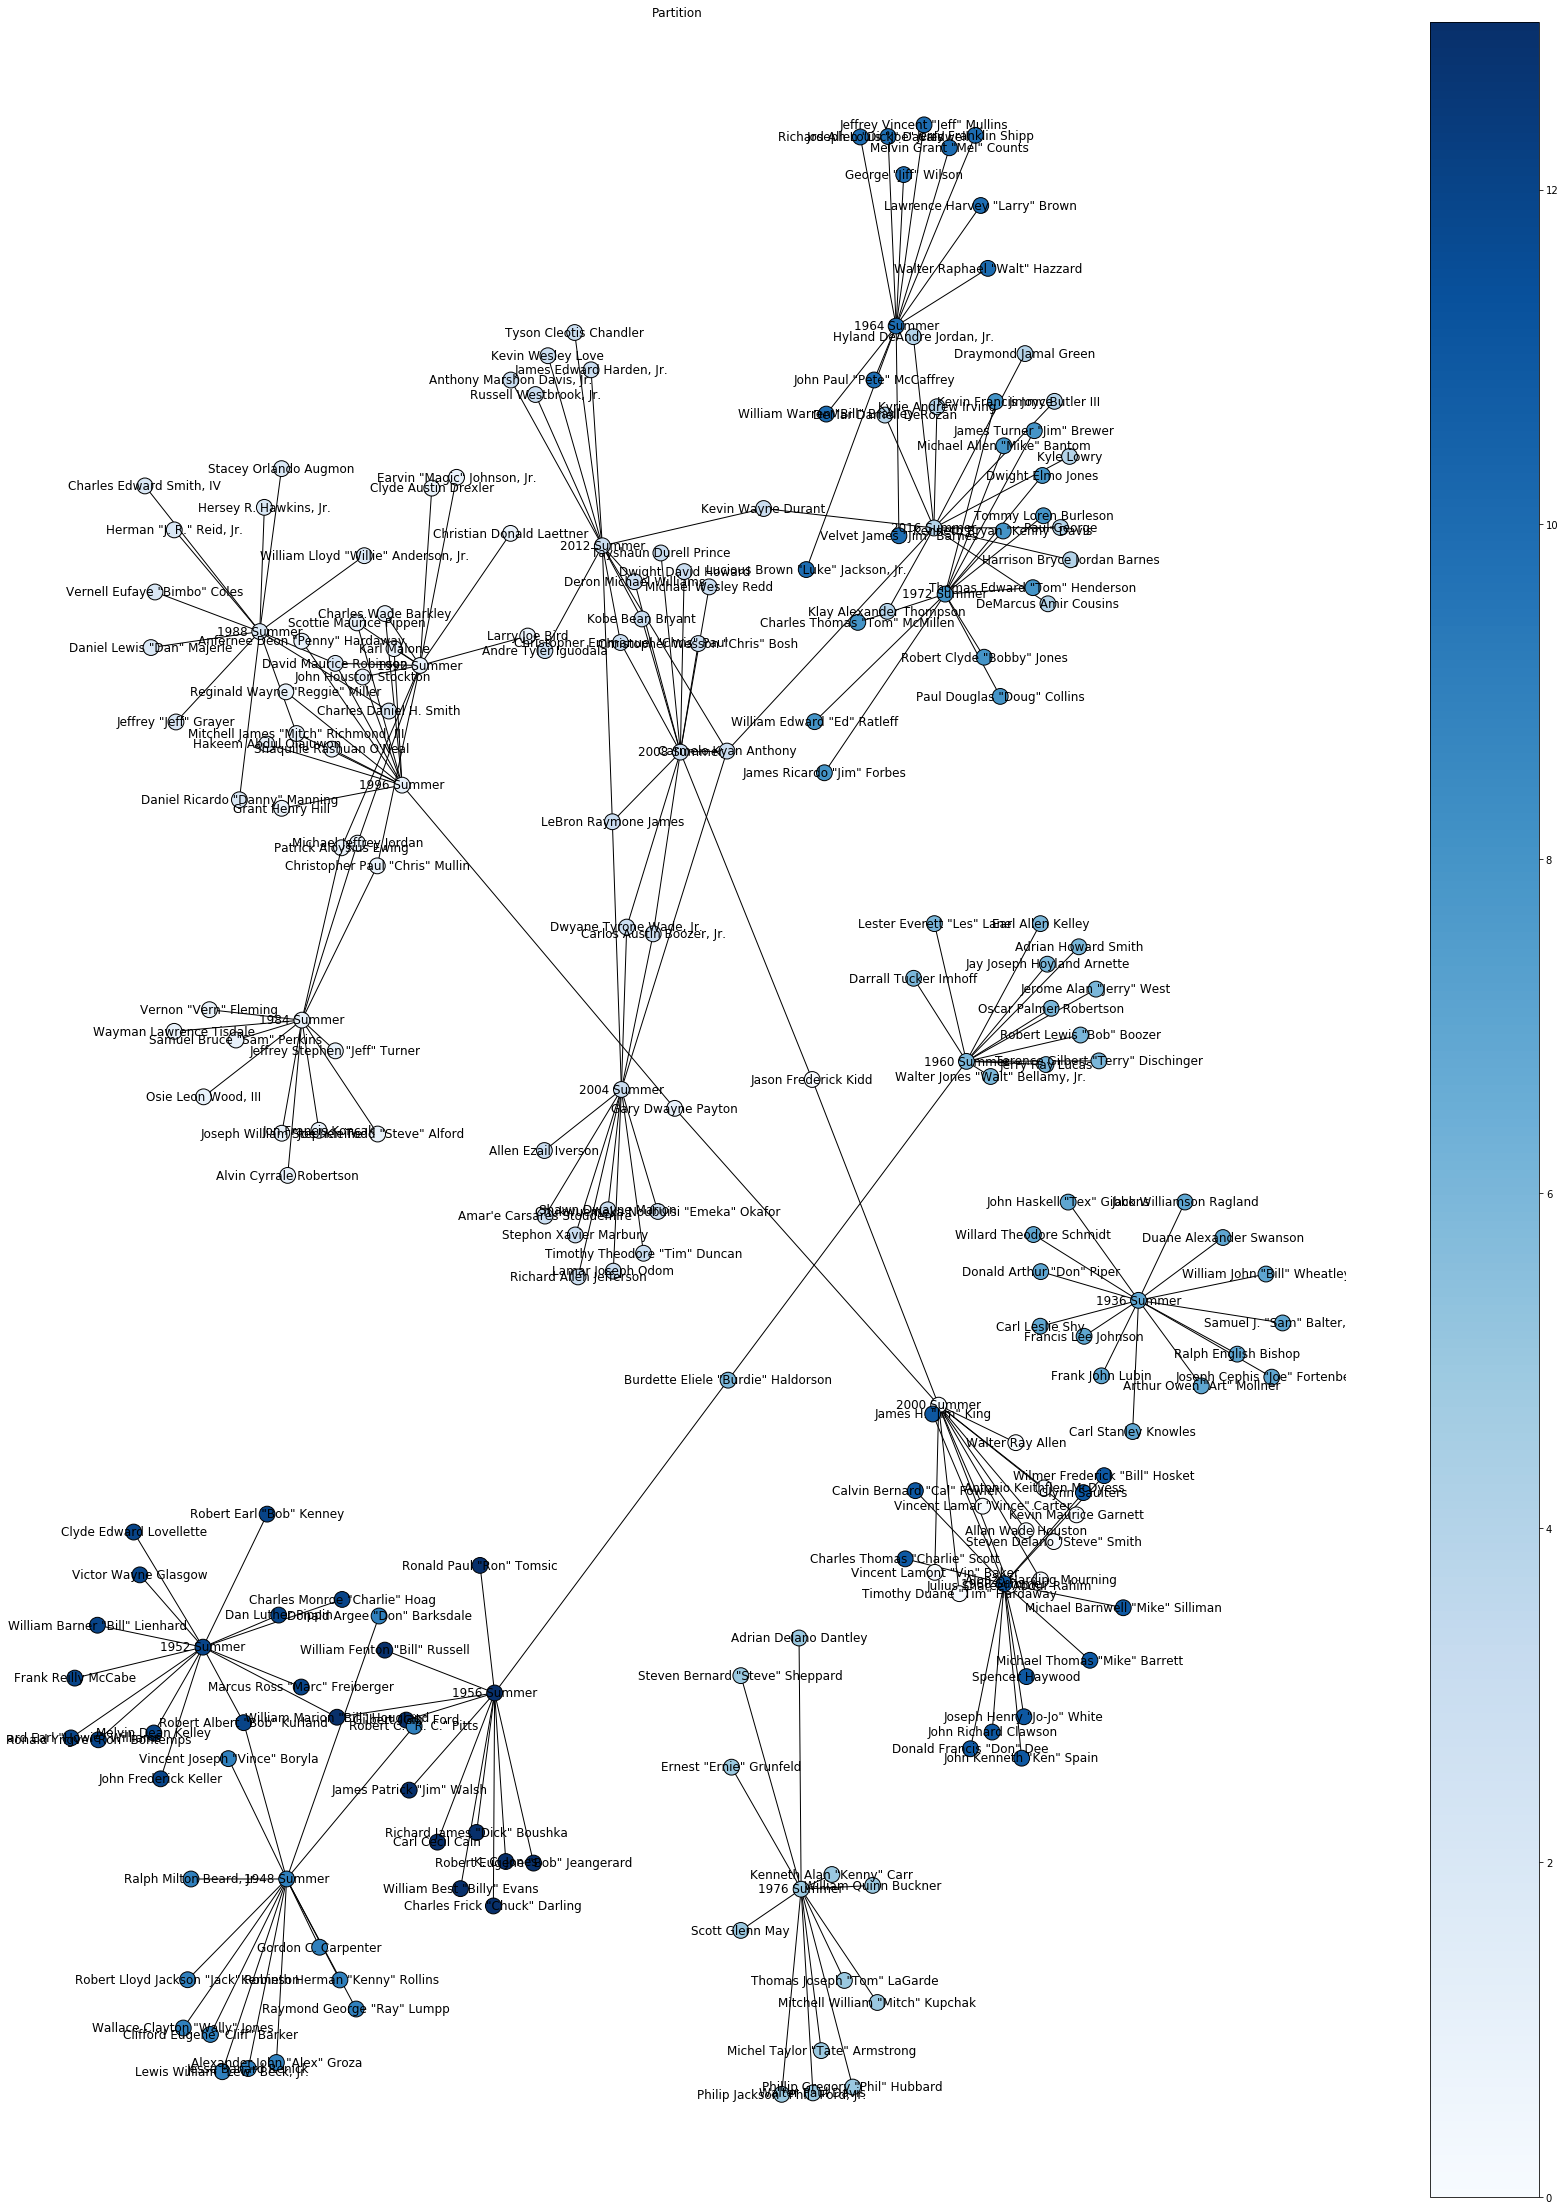

In [280]:
plt.figure(figsize=(30,40))

draw(g, pos, louvain.best_partition(g), 'Partition');


## Bonus: Hierarchical Graphs

Thus far, we have analyzed graphs where the nodes represented individual players and the edges represented Olympic games that they have competed in together. We can analyze the data at a higher level if we wanted to, strippping out the players as entities and analyzing the data at the Games level. To do this, we would need to reconstruct the graph so that the *Games* field represents the entities and then use the player names as the edge criteria so that there would be an edge between two Olympic games if an player played in both of them. You already have the tools in your toolbox to be able to do this, so give it a try. 

### Create a graph with Games as the entities and then print out the graph statistics.

In [ ]:
"""
I kinf od did it together in the avobe ejercise.
"""

### Generate a network visualization of this graph using the layout of your choice.